In [2]:
from PIL import Image, ImageOps
import os
import pandas as pd
import numpy as np
import os
import csv
from skimage.feature import graycomatrix, graycoprops
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
import cv2

In [4]:
pip install rembg

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
from rembg import remove

Prprocessing Citra

In [6]:
os.makedirs("Kelapa_Resize", exist_ok=True)
os.makedirs("Kelapa_Resize/Kelapa Standar", exist_ok=True)
os.makedirs("Kelapa_Resize/Kelapa Tidak Standar", exist_ok=True)


for folder in os.listdir("Kelapa"):
    for filename in os.listdir(os.path.join("Kelapa", folder)):
        img = Image.open(os.path.join("Kelapa", folder, filename))
        img = img.resize((800, 600))
        img.save(os.path.join("Kelapa_Resize", folder, filename))
        print("Image resized to:", os.path.join("Kelapa_Resize", folder, filename))

Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (1).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (10).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (100).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (101).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (102).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (103).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (104).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (105).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (106).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (107).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (108).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (109).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (11).jpg
Image resized to: Kelapa_Resize\Kelapa Standar\Kelapa Standar (110).

In [7]:
os.makedirs("Kelapa_Rembg", exist_ok=True)
os.makedirs("Kelapa_Rembg/Kelapa Standar", exist_ok=True)
os.makedirs("Kelapa_Rembg/Kelapa Tidak Standar", exist_ok=True)

for folder in os.listdir("Kelapa_Resize"):
    for filename in os.listdir(os.path.join("Kelapa_Resize", folder)):
        img = Image.open(os.path.join("Kelapa_Resize", folder, filename))
        result = remove(img)
        filename = filename.replace(".jpg", ".png")
        result.save(os.path.join("Kelapa_Rembg", folder, filename))
        print("Background image removed on:", os.path.join("Kelapa_Rembg", folder, filename))

EP Error D:\a\_work\1\s\onnxruntime\core\session\provider_bridge_ort.cc:1193 onnxruntime::ProviderLibrary::Get [ONNXRuntimeError] : 1 : FAIL : LoadLibrary failed with error 126 "" when trying to load "C:\Users\Admin ID\AppData\Roaming\Python\Python311\site-packages\onnxruntime\capi\onnxruntime_providers_tensorrt.dll"
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
Background image removed on: Kelapa_Rembg\Kelapa Standar\Kelapa Standar (1).png
EP Error D:\a\_work\1\s\onnxruntime\core\session\provider_bridge_ort.cc:1193 onnxruntime::ProviderLibrary::Get [ONNXRuntimeError] : 1 : FAIL : LoadLibrary failed with error 126 "" when trying to load "C:\Users\Admin ID\AppData\Roaming\Python\Python311\site-packages\onnxruntime\capi\onnxruntime_providers_tensorrt.dll"
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CU

In [8]:
os.makedirs("Kelapa_Crop", exist_ok=True)
os.makedirs("Kelapa_Crop/Kelapa Standar", exist_ok=True)
os.makedirs("Kelapa_Crop/Kelapa Tidak Standar", exist_ok=True)

for folder in os.listdir("Kelapa_Rembg"):
    for filename in os.listdir(os.path.join("Kelapa_Rembg", folder)):
        img = Image.open(os.path.join("Kelapa_Rembg", folder, filename))
        img = img.crop(img.getbbox())
        img.save(os.path.join("Kelapa_Crop", folder, filename))
        print("Image resized to:", os.path.join("Kelapa_Crop", folder, filename))

Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (1).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (10).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (100).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (101).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (102).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (103).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (104).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (105).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (106).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (107).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (108).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (109).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (11).png
Image resized to: Kelapa_Crop\Kelapa Standar\Kelapa Standar (110).png
Image resized to: Kelapa

Ekstraksi Fitur

In [174]:
path = 'E:\Tesis S2 CINDA\Kelapa_Crop\Kelapa Standar'
data = os.listdir(path)

rataR = []
rataG = []
rataB = []
rataH = []
rataS = []
rataV = []
ratagray = []
stand = []

luas = []
keliling= []

contrast = []
dissimilarity = []
homogeneity = []
energy = []
correlation = []
label = []

for gbr in data:
    gbr_read = cv2.imread(os.path.join(path, gbr))
    gbr_rgb = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2RGB)
    (R, G, B) = cv2.split(gbr_rgb)
    meanR = np.mean(R)
    rataR.append(meanR)
    meanG = np.mean(G)
    rataG.append(meanG)
    meanB = np.mean(B)
    rataB.append(meanB)

    gbr_hsv = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2HSV)
    H = gbr_hsv[:, :, 0]
    S = gbr_hsv[:, :, 1]
    V = gbr_hsv[:, :, 2]
    meanH = np.mean(H)
    rataH.append(meanH)
    meanS = np.mean(S)
    rataS.append(meanS)
    meanV = np.mean(V)
    rataV.append(meanV)

    gbr_gray = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2GRAY)
    rata = np.mean(gbr_gray)
    ratagray.append(rata)
    standar = np.std(gbr_gray)
    stand.append(standar)

    
    
    _, thresh = cv2.threshold(gbr_gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter_val = cv2.arcLength(contour, True)
    else:
        area = 0
        perimeter_val = 0
    
    luas.append(area)
    keliling.append(perimeter_val)

    # Ekstraksi Fitur Tekstur (GLCM)
    glcm = graycomatrix(gbr_gray, [1], [0], 256, symmetric=True, normed=True)
    contrast_val = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity_val = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity_val = graycoprops(glcm, 'homogeneity')[0, 0]
    energy_val = graycoprops(glcm, 'energy')[0, 0]
    correlation_val = graycoprops(glcm, 'correlation')[0, 0]
    
    contrast.append(contrast_val)
    dissimilarity.append(dissimilarity_val)
    homogeneity.append(homogeneity_val)
    energy.append(energy_val)
    correlation.append(correlation_val)

    Jenis_Kelapa = '0'
    label.append(Jenis_Kelapa)

data1 = pd.DataFrame(rataR, columns=['Mean-R'])
data2 = pd.DataFrame(rataG, columns=['Mean-G'])
data3 = pd.DataFrame(rataB, columns=['Mean-B'])
data4 = pd.DataFrame(rataH, columns=['Mean-H'])
data5 = pd.DataFrame(rataV, columns=['Mean-V'])
data6 = pd.DataFrame(rataS, columns=['Mean-s'])
data7 = pd.DataFrame(ratagray, columns=['Mean-Gray'])
data8 = pd.DataFrame(stand, columns=['Standar-Deviasi'])
data9 = pd.DataFrame(luas, columns=['Luas'])
data10 = pd.DataFrame(keliling, columns=['Keliling'])
data11 = pd.DataFrame(contrast, columns=['Contrast'])
data12 = pd.DataFrame(dissimilarity, columns=['Dissimilarity'])
data13 = pd.DataFrame(homogeneity, columns=['Homogeneity'])
data14 = pd.DataFrame(energy, columns=['Energy'])
data15 = pd.DataFrame(correlation, columns=['Correlation'])
data16 = pd.DataFrame(label, columns=['Jenis Kelapa'])

listdata1 = [data1, data2, data3, data4, data5, data6, data7, data8, data9, 
             data10, data11, data12, data13, data14, data15, data16]
gabung1 = pd.concat(listdata1, axis=1)


In [175]:
path = 'E:\Tesis S2 CINDA\Kelapa_Crop\Kelapa Tidak Standar'
data = os.listdir(path)

rataR = []
rataG = []
rataB = []
rataH = []
rataS = []
rataV = []
ratagray = []
stand = []

luas = []
keliling = []

contrast = []
dissimilarity = []
homogeneity = []
energy = []
correlation = []
label = []

for gbr in data:
    gbr_read = cv2.imread(os.path.join(path, gbr))
    gbr_rgb = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2RGB)
    (R, G, B) = cv2.split(gbr_rgb)
    meanR = np.mean(R)
    rataR.append(meanR)
    meanG = np.mean(G)
    rataG.append(meanG)
    meanB = np.mean(B)
    rataB.append(meanB)
    
    gbr_hsv = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2HSV)
    H = gbr_hsv[:, :, 0]
    S = gbr_hsv[:, :, 1]
    V = gbr_hsv[:, :, 2]
    meanH = np.mean(H)
    rataH.append(meanH)
    meanS = np.mean(S)
    rataS.append(meanS)
    meanV = np.mean(V)
    rataV.append(meanV)

    gbr_gray = cv2.cvtColor(gbr_read, cv2.COLOR_BGR2GRAY)
    rata = np.mean(gbr_gray)
    ratagray.append(rata)
    standar = np.std(gbr_gray)
    stand.append(standar)  
    
    _, thresh = cv2.threshold(gbr_gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter_val = cv2.arcLength(contour, True)
    else:
        area = 0
        perimeter_val = 0
    
    luas.append(area)
    keliling.append(perimeter_val)

    # Ekstraksi Fitur Tekstur (GLCM)
    glcm = graycomatrix(gbr_gray, [1], [0], 256, symmetric=True, normed=True)
    contrast_val = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity_val = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity_val = graycoprops(glcm, 'homogeneity')[0, 0]
    energy_val = graycoprops(glcm, 'energy')[0, 0]
    correlation_val = graycoprops(glcm, 'correlation')[0, 0]
    
    contrast.append(contrast_val)
    dissimilarity.append(dissimilarity_val)
    homogeneity.append(homogeneity_val)
    energy.append(energy_val)
    correlation.append(correlation_val)

    Jenis_Kelapa = '1'
    label.append(Jenis_Kelapa)

data1 = pd.DataFrame(rataR, columns=['Mean-R'])
data2 = pd.DataFrame(rataG, columns=['Mean-G'])
data3 = pd.DataFrame(rataB, columns=['Mean-B'])
data4 = pd.DataFrame(rataH, columns=['Mean-H'])
data5 = pd.DataFrame(rataV, columns=['Mean-V'])
data6 = pd.DataFrame(rataS, columns=['Mean-s'])
data7 = pd.DataFrame(ratagray, columns=['Mean-Gray'])
data8 = pd.DataFrame(stand, columns=['Standar-Deviasi'])
data9 = pd.DataFrame(luas, columns=['Luas'])
data10 = pd.DataFrame(keliling, columns=['Keliling'])
data11 = pd.DataFrame(contrast, columns=['Contrast'])
data12 = pd.DataFrame(dissimilarity, columns=['Dissimilarity'])
data13 = pd.DataFrame(homogeneity, columns=['Homogeneity'])
data14 = pd.DataFrame(energy, columns=['Energy'])
data15 = pd.DataFrame(correlation, columns=['Correlation'])
data16 = pd.DataFrame(label, columns=['Jenis Kelapa'])

listdata1 = [data1, data2, data3, data4, data5, data6, data7, data8, data9, 
             data10, data11, data12, data13, data14, data15, data16]
gabung2 = pd.concat(listdata1, axis=1)


In [176]:

listdata = [gabung1, gabung2]
total = pd.concat(listdata, ignore_index=True)
total.to_csv("ekstrasi-fitur-kelapa_OK7.csv", index=False)
total.to_excel("ekstrasi-fitur-kelapa_OK7.xlsx", index=False)

print("tahap preprocessing telah selsai dibuat")

tahap preprocessing telah selsai dibuat


Pengolahan Model untuk Klasifikasi

In [177]:
#menampung dataset untuk warna, bentuk, dan tekstur
def_Kelapa = pd.read_csv('ekstrasi-fitur-kelapa_OK7.csv')
#dataset warna dan tekstur
#def_Kopra = pd.read_csv('ekstrasi-fitur-kopra-nonTelungkup1.csv')

Split Dependent (Target/Label) Independent (atribut) Value

In [178]:
#skenario W
#x = def_Kelapa.iloc[:,0:8].values
#y = def_Kelapa.iloc[:,[-1]].values
#skenario B
#x = def_Kelapa.iloc[:,8:10].values
#y = def_Kelapa.iloc[:,[-1]].values
#skenario T
#x = def_Kelapa.iloc[:,10:15].values
#y = def_Kelapa.iloc[:,[-1]].values
#Skenario W dan B
#x = def_Kelapa.iloc[:,0:10].values
#y = def_Kelapa.iloc[:,[-1]].values
#Skenario W dan T
#x = def_Kelapa.iloc[:, list(range(8)) + list(range(10, 15))].values
#y = def_Kelapa.iloc[:,[-1]].values
#Skenario B dan T
#x = def_Kelapa.iloc[:,8:15].values
#y = def_Kelapa.iloc[:,[-1]].values
#Skenario W,B,dan T
x = def_Kelapa.iloc[:,0:15].values
y = def_Kelapa.iloc[:,[-1]].values

In [179]:
y = y.reshape(len(y))

Feature Scaling

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [181]:
def_Kelapa

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-s,Mean-Gray,Standar-Deviasi,Luas,Keliling,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis Kelapa
0,28.729515,20.711485,8.633694,3.820883,28.733358,34.727363,21.732550,48.914986,33341.0,2567.041962,77.106469,2.892961,0.812773,0.783587,0.983908,0
1,24.079941,16.978672,7.078736,2.903175,24.081716,28.216630,17.974225,45.678221,25307.0,4453.476719,58.479733,2.276563,0.849830,0.827743,0.986004,0
2,34.210649,24.218365,10.974469,3.765769,34.212180,36.573867,25.698793,52.436582,33204.0,3829.237042,38.701163,2.126967,0.803858,0.767803,0.992971,0
3,83.959296,66.818582,36.803808,10.231651,83.960655,74.488534,68.505200,71.728391,55227.5,2608.372915,92.529700,5.104273,0.517923,0.429047,0.991010,0
4,76.707185,54.327912,30.178851,9.255140,76.729575,77.429701,58.281012,62.864632,55416.5,4814.478806,147.990005,6.381118,0.511634,0.430550,0.981282,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,62.172716,40.898670,33.165352,11.383524,62.185434,78.054065,46.388974,45.375693,562.0,331.019333,197.495583,8.150443,0.426557,0.352400,0.952033,1
496,66.813899,42.918132,31.683059,13.379736,66.820221,86.082355,48.791827,47.199339,4920.5,1312.981877,168.133594,7.489323,0.416618,0.325365,0.962255,1
497,53.421637,29.927683,22.020299,11.436655,53.440008,89.516897,36.051493,42.102286,996.5,1205.113907,196.398449,7.157240,0.477864,0.383338,0.944639,1
498,56.386688,43.778366,37.506044,9.466412,56.389137,52.407540,46.834191,55.079460,7522.0,1386.645871,120.267273,5.833752,0.505313,0.420506,0.980192,1


In [182]:
x

array([[0.15850333, 0.16272157, 0.07778911, ..., 0.89559772, 0.90542733,
        0.84910317],
       [0.11315097, 0.1172573 , 0.04437603, ..., 0.97266991, 0.97898106,
        0.87311118],
       [0.21196681, 0.20543406, 0.12808791, ..., 0.87705616, 0.87913447,
        0.95293161],
       ...,
       [0.39935251, 0.27497141, 0.36544176, ..., 0.19905199, 0.23870026,
        0.39924098],
       [0.42827388, 0.44366753, 0.69820091, ..., 0.25614049, 0.30061359,
        0.80653652],
       [0.1606533 , 0.12869678, 0.18915332, ..., 0.73694733, 0.75176597,
        0.68795718]])

In [183]:
kolom_yang_di_exclude = ['Jenis Kelapa']
def_Kelapa_baru = def_Kelapa.drop(columns=kolom_yang_di_exclude)

In [184]:
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(def_Kelapa_baru), columns=def_Kelapa_baru.columns)
df_minmax

,Mean-R,Mean-G,Mean-B,Mean-H,Mean-V,Mean-s,Mean-Gray,Standar-Deviasi,Luas,Keliling,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,0.158503,0.162722,0.077789,0.045244,0.158249,0.111975,0.160367,0.438772,0.299040,0.276639,0.231377,0.229238,0.895598,0.905427,0.849103
1,0.113151,0.117257,0.044376,0.018514,0.112861,0.056533,0.113695,0.384988,0.226972,0.481132,0.170672,0.161961,0.972670,0.978981,0.873111
2,0.211967,0.205434,0.128088,0.043639,0.211708,0.127699,0.209622,0.497289,0.297811,0.413463,0.106214,0.145634,0.877056,0.879134,0.952932
3,0.697220,0.724289,0.683111,0.231971,0.697121,0.450562,0.741210,0.817854,0.495369,0.281119,0.281641,0.470591,0.282366,0.314841,0.930457
4,0.626482,0.572157,0.540754,0.203528,0.626565,0.475607,0.614241,0.670568,0.497064,0.520266,0.462386,0.609951,0.269286,0.317345,0.819020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.484711,0.408594,0.604928,0.265522,0.484653,0.480924,0.466561,0.379961,0.005001,0.034249,0.623725,0.803064,0.092343,0.187164,0.483945
496,0.529982,0.433190,0.573076,0.323666,0.529876,0.549289,0.496401,0.410264,0.044098,0.140696,0.528034,0.730906,0.071672,0.142130,0.601052
497,0.399353,0.274971,0.365442,0.267069,0.399321,0.578536,0.338186,0.325568,0.008899,0.129003,0.620149,0.694661,0.199052,0.238700,0.399241
498,0.428274,0.443668,0.698201,0.209682,0.428096,0.262531,0.472090,0.541205,0.067435,0.148682,0.372038,0.550209,0.256140,0.300614,0.806537


Split Data Testing dan Data Training

In [185]:
#Splitting 70:30
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

Klasifikasi dengan KNN

In [186]:
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean').fit(x_train,y_train)
knn

KNeighborsClassifier(metric='euclidean')

Prediksi

In [187]:
y_prediksi = knn.predict(x_test)

Akurasi

In [188]:
#Metrik Akurasi
# Membuat DataFrame untuk data uji
df_prediksi = pd.DataFrame({'Prediksi': y_prediksi, 'Label Sebenarnya': y_test})

# Mencetak citra yang terprediksi benar dan salah
for index, row in df_prediksi.iterrows():
    if row['Prediksi'] == row['Label Sebenarnya']:
        print(f"Citra ke-{index+1}: Prediksi benar")
    else:
        print(f"Citra ke-{index+1}: Prediksi salah")

# Menghitung jumlah prediksi yang benar
jumlah_benar = (df_prediksi['Prediksi'] == df_prediksi['Label Sebenarnya']).sum()
jumlah_seluruh = len(df_prediksi)

# Menghitung dan mencetak nilai akurasi
nilai_akurasi = jumlah_benar / jumlah_seluruh
print("Jumlah prediksi yang benar:", jumlah_benar)
print("Jumlah seluruh prediksi:", jumlah_seluruh)
print("Nilai akurasi:", nilai_akurasi)


Citra ke-1: Prediksi benar
Citra ke-2: Prediksi benar
Citra ke-3: Prediksi benar
Citra ke-4: Prediksi benar
Citra ke-5: Prediksi salah
Citra ke-6: Prediksi benar
Citra ke-7: Prediksi benar
Citra ke-8: Prediksi benar
Citra ke-9: Prediksi benar
Citra ke-10: Prediksi benar
Citra ke-11: Prediksi benar
Citra ke-12: Prediksi benar
Citra ke-13: Prediksi benar
Citra ke-14: Prediksi benar
Citra ke-15: Prediksi benar
Citra ke-16: Prediksi benar
Citra ke-17: Prediksi benar
Citra ke-18: Prediksi benar
Citra ke-19: Prediksi benar
Citra ke-20: Prediksi benar
Citra ke-21: Prediksi benar
Citra ke-22: Prediksi benar
Citra ke-23: Prediksi benar
Citra ke-24: Prediksi benar
Citra ke-25: Prediksi benar
Citra ke-26: Prediksi benar
Citra ke-27: Prediksi benar
Citra ke-28: Prediksi benar
Citra ke-29: Prediksi benar
Citra ke-30: Prediksi benar
Citra ke-31: Prediksi benar
Citra ke-32: Prediksi benar
Citra ke-33: Prediksi benar
Citra ke-34: Prediksi benar
Citra ke-35: Prediksi benar
Citra ke-36: Prediksi benar
C

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.92      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



<Axes: >

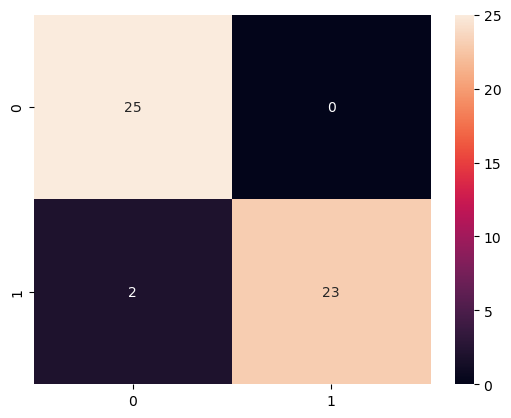

In [189]:
print(classification_report(y_test, y_prediksi))
sb.heatmap(confusion_matrix(y_test, y_prediksi),annot=True)

In [170]:
knn

KNeighborsClassifier(metric='euclidean')

In [192]:
import pickle 
pickle.dump(knn,open('model.pkl','wb'))

In [193]:
import joblib

In [194]:
# Save the model as a pickle in a file
joblib.dump(knn, "Knn_Classifier_coconut.pkl")

['Knn_Classifier_coconut.pkl']

# konfersi menjadi tflite

In [126]:
!pip install tensorflow

^C


In [24]:
!pip install onnx onnxmltools tf2onnx

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnxconverter-common 1.14.0 requires protobuf==3.20.2, but you have protobuf 3.20.3 which is incompatible.


In [25]:
!pip install skl2onnx

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-3.20.2-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [23]:
import tensorflow as tf

# Create an equivalent neural network model in TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(2, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the TensorFlow model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))





Epoch 1/50


11/11 [==============================] - 4s 84ms/step - loss: 0.9159 - accuracy: 0.4971 - val_loss: 0.8255 - val_accuracy: 0.5067
Epoch 2/50
11/11 [==============================] - 0s 12ms/step - loss: 0.8154 - accuracy: 0.4971 - val_loss: 0.7498 - val_accuracy: 0.5067
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 0.7424 - accuracy: 0.5200 - val_loss: 0.6998 - val_accuracy: 0.5200
Epoch 4/50
11/11 [==============================] - 0s 12ms/step - loss: 0.6977 - accuracy: 0.5029 - val_loss: 0.6724 - val_accuracy: 0.5600
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 0.6737 - accuracy: 0.5743 - val_loss: 0.6584 - val_accuracy: 0.6400
Epoch 6/50
11/11 [==============================] - 0s 12ms/step - loss: 0.6593 - accuracy: 0.6371 - val_loss: 0.6492 - val_accuracy: 0.6267
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.6480 - accuracy: 0.6371 - val_loss: 0.6402 - val_accuracy: 0.6133
Epoch 8/5

In [32]:
# Konversi model TensorFlow ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke dalam file
with open('model_knn.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpkarwp89v\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpkarwp89v\assets


# Konfersi langsung dari KNN to ONNX to Tflite

In [40]:
from skl2onnx import to_onnx

In [57]:
x=x.astype(np.float32)
onx = to_onnx(knn,x[:1])
with open("rf_knn2.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [2]:
pip install onnx_tf

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install onnx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
from tensorflow.python.compiler.tensorrt import trt_convert as trt

# Path to the ONNX model file
onnx_model_path = 'rf_knn2.onnx'

# Path to save the TFLite model
tflite_model_path = 'model.tflite'

In [10]:
# Load the ONNX model
onnx_model = onnx.load(onnx_model_path)

In [15]:
from onnx_tf.backend import prepare

tf_rep = prepare(onnx_model)

AttributeError: module 'tensorflow' has no attribute 'ceil'

In [191]:
pip install tensorflow==1.15.5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.5 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==1.15.5


In [66]:
import tensorflow as tf

# Convert TensorFlow model to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('E:\Tesis S2 CINDA') 
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke dalam file
with open('model_knn-2.tflite', 'wb') as f:
    f.write(tflite_model)

OSError: SavedModel file does not exist at: E:\Tesis S2 CINDA\{saved_model.pbtxt|saved_model.pb}

In [171]:
n_akurasi = []
for k in range (1,100):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(x_train,y_train)
    y_prediksi = knn.predict(x_test)
    akurasi = accuracy_score(y_test,y_prediksi)
    n_akurasi.append(akurasi)
print(n_akurasi)

[0.86, 0.86, 0.9, 0.92, 0.96, 0.88, 0.88, 0.88, 0.9, 0.88, 0.88, 0.86, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.86, 0.86, 0.86, 0.86, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84]


In [29]:
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=99)

In [ ]:
# Menguji coba model
import numpy as np
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = tf.keras.utils.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = cnn_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)
  
  print(fn)
  if classes==0:
    print('Bad Quality')
  elif classes==1:
    print('Empty Background')
  elif classes==2:
    print('GOOD Quality')